# Project 1: Fashion MNIST Demo
## Training a Neural Network to Classify Images of Clothing

### 1. Import Packages & Load Data

In [ ]:
%tensorflow_version 2.x

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# split data
# train data - teach model
# test data  - evaluate model

4423680/4422102 [==============================] - 0s 0us/step


### 2. Explore Data

### ```class_names``` explanation
```python
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # Set our labels
```

```python
class_index = [0, 1 , 2, 3 , 4, 5, 6, 7, 8, 9]
```

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # Set our labels

In [ ]:
train_images.shape # 60000 images, 28*28 (784) pixels

(60000, 28, 28)

In [ ]:
test_images.shape # 10000 images, 28*28 (784) pixels

(10000, 28, 28)

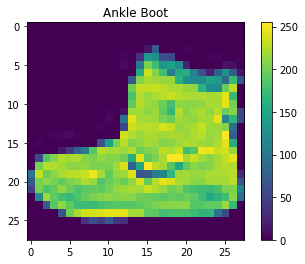

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.title('Ankle Boot')
plt.show()

We scale the values to a range of 0 - 1. So we divide the values by 255.
* training set + testing set to be preprocesed in the same way

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0
# each element for each image represents the intensity of the corresponding pixel
# with a value between [0, 255].
# We rescale this image by dividing each pixel’s value by 255
# scales features to [0, 1]

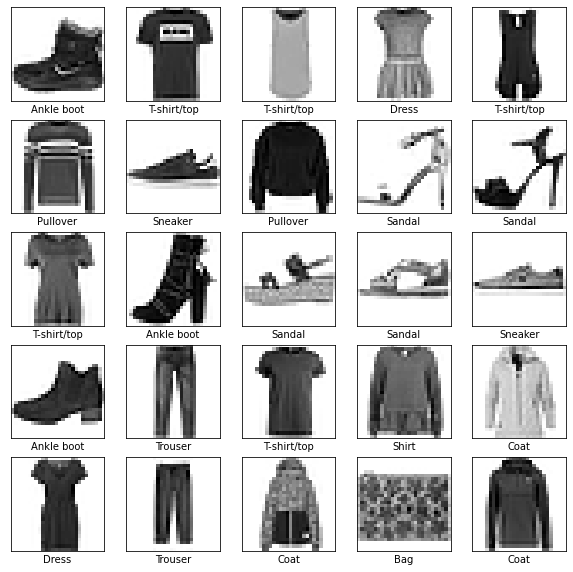

In [ ]:
plt.figure(figsize=(10,10)) # Data verification
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 3. Choose an Algorithm

ADAM: find individual learning rates for each parameter

SPARSE CATEGORICAL CROSSENTROPY: measure the dissimilarity between predicted class probability & observed class labels

RELU: introduces nonlinearity to our model 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 2d -> 1d array
    keras.layers.Dense(128, activation='relu'), # 128 neurons
    keras.layers.Dense(10) # output layer, 10 neurons
])

model.compile(optimizer='adam', # how our model is updated
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # calc error
              metrics=['accuracy']) # calc accuracy

### 4. Train Your Model

$ model.fit(x, y, epochs=EPOCHS, verbose=VERBOSE, callbacks=CALLBACKS) $

In [ ]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4968 - accuracy: 0.8243
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8645
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3385 - accuracy: 0.8766
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.8841
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8910
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2810 - accuracy: 0.8961
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2714 - accuracy: 0.8995
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9033
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2495 - accuracy: 0.9077
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

### 5. Test Your Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels) # performance on test dataset

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.8500 - accuracy: 0.8756

Test accuracy: 0.8755999803543091


In [ ]:
test_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()]) # logits -> probabilities

In [ ]:
predictions = test_model.predict(test_images)

In [ ]:
predictions[0] # predict label for each image. let's check 1st prediction

array([2.15304794e-33, 9.75221635e-30, 1.73758690e-20, 5.06884449e-32,
       2.20430262e-30, 1.89682851e-06, 1.21014814e-26, 4.28366042e-14,
       7.71200972e-25, 9.99998093e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0]) # highest confidence value between 0 - 9

9

```python
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # Set our labels
```

In [ ]:
np.argmax(predictions[0]) # class name: ankle boot

9

In [ ]:
test_labels[0] # examine test label; correct prediction

9

In [ ]:
def plot_image(i, predictions_array, true_label, img): # helper functions
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

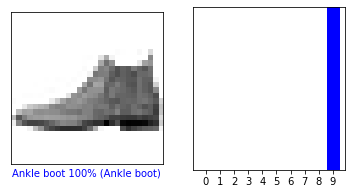

In [ ]:
i = 0 # view predictions[0]
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

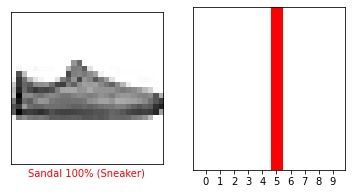

In [ ]:
i = 12 # predictions[12]
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

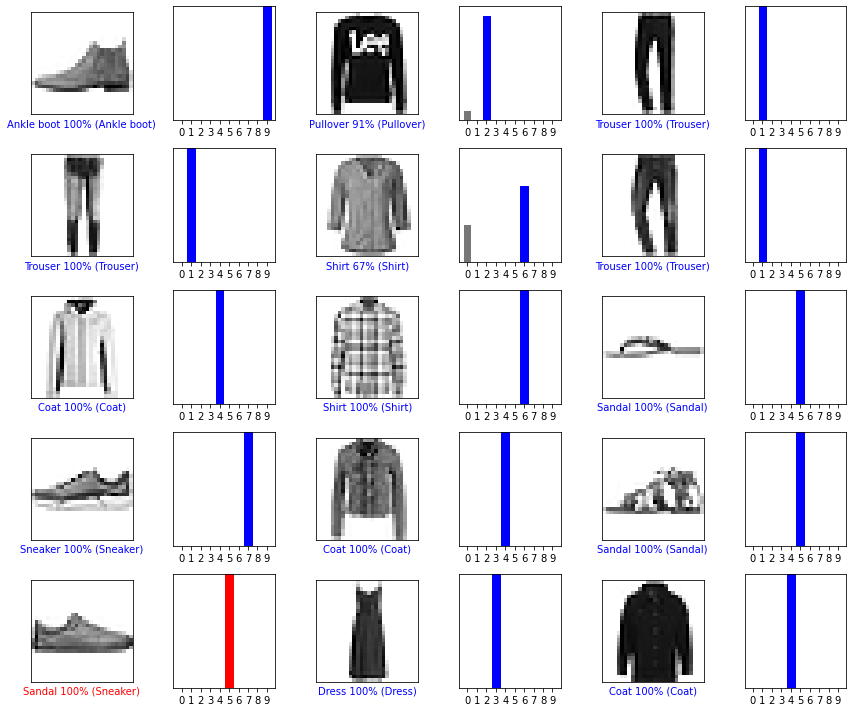

In [ ]:
num_rows = 5 # view every prediction
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Congrats on Solving Your First Project in ML!
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
###### Credits: https://www.tensorflow.org/tutorials/keras/classification